In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

# output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR/")
output = MultiParamOutputLoader("/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/sim_output/1595359062.49771-test_protocol_QFNR")

/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [2]:
output.param_scenarios

['Optimistic Parameters', 'Nominal Parameters', 'Pessimistic Parameters']

In [3]:
output.sim_results['Nominal Parameters'][(0.1,)][0]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,34279,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.0,0.000000,0.000000,0.000000
1,34261,6,8,0,2,2,6,0,0,0,...,0,0,0,8,7,8,8.0,6.827829,0.126111,0.046060
2,34230,23,13,3,5,7,3,2,2,0,...,0,1,0,16,11,19,16.0,10.729446,0.198174,0.072381
3,34211,34,23,4,11,4,3,2,0,0,...,0,0,0,19,14,27,19.0,13.655658,0.252221,0.092121
4,34190,46,31,6,4,6,1,1,1,0,...,0,0,0,24,21,34,24.0,20.483487,0.378332,0.138181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,32914,97,234,1016,6,3,1,0,1,1,...,0,0,0,609,668,586,609.0,651.569965,12.034563,4.395473
109,32907,98,236,1029,3,1,2,0,0,0,...,0,0,0,612,674,588,612.0,657.422390,12.142658,4.434953
110,32910,86,237,1040,4,3,1,0,0,1,...,0,0,0,616,680,593,616.0,663.274814,12.250752,4.474433
111,32903,83,233,1055,3,5,2,1,0,0,...,0,0,0,618,685,601,618.0,668.151835,12.340832,4.507333


In [9]:
from deprecated.params import ParamConfig

# Massey's suggestion (but syntax looks different)
# from load_params import load_params

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [10]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]

In [11]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

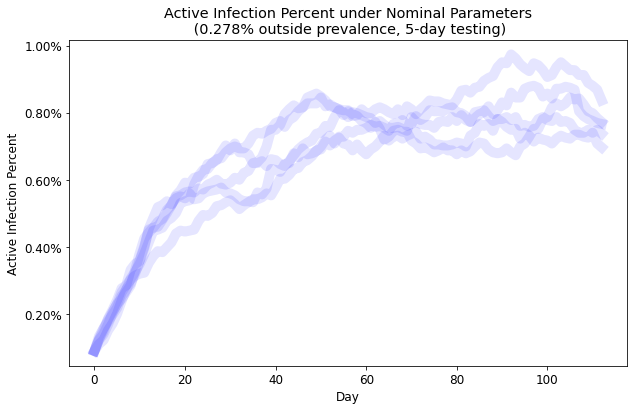

In [12]:
dfs=output.sim_results['Nominal Parameters'][(0.1,)]

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
aip_cols = list(get_active_infection_cols(dfs[0]))
pop_size = get_pop_size(dfs[0])
for df in dfs:
    aip = df[aip_cols].sum(axis=1) / pop_size
    ax.plot(aip, linewidth=10, alpha=0.1, color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Active Infection Percent')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax.set_title('Active Infection Percent under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)')
plt.show()

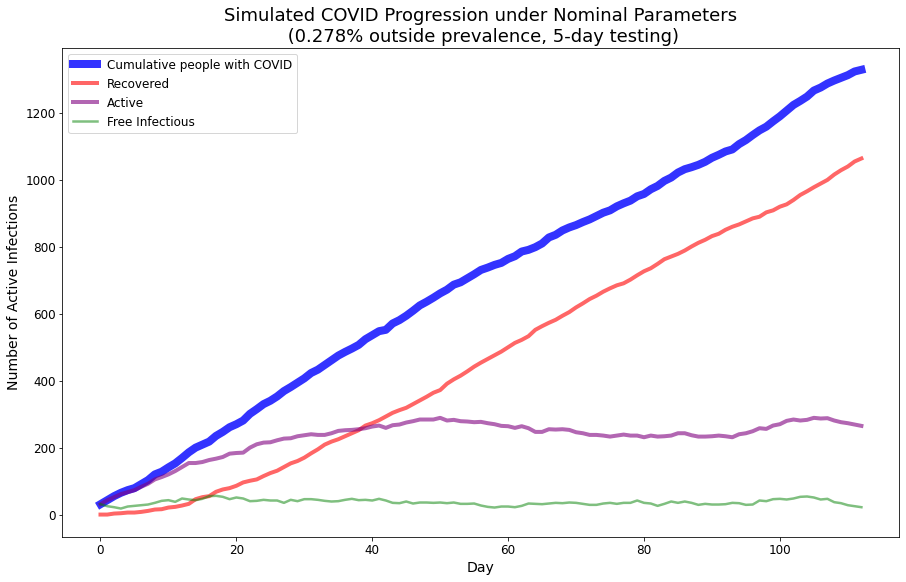

In [13]:
plt.figure(figsize=(15,9))
sample = dfs[0]

plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(sample[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(sample[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#sample_high

Text(0, 0.5, 'Cumulative People in each severity class')

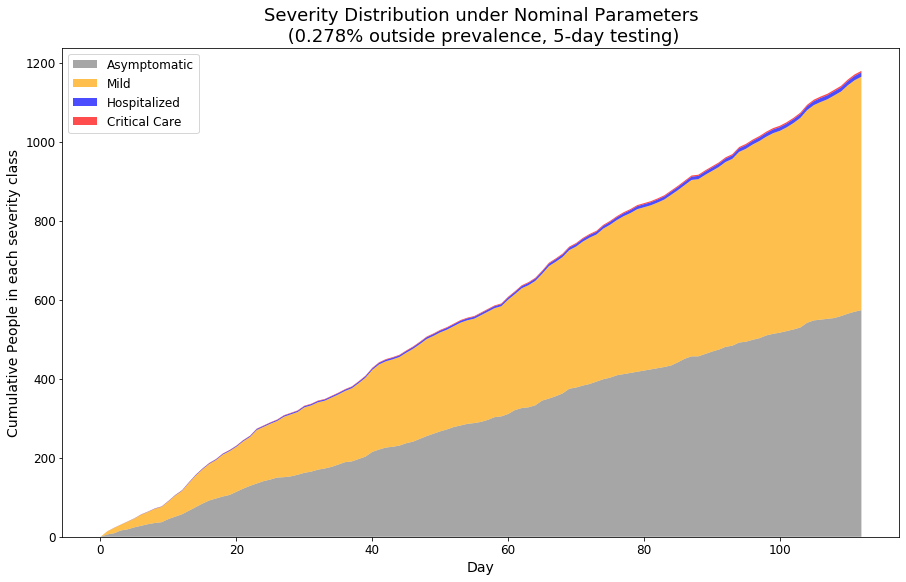

In [25]:
df_0 = sample

# Metric: Area graph of the number of people in each severity state
plt.figure(figsize=(15,9))
y0 = list(df_0['severity_0'])
y1 = list(df_0['severity_1'])
y2 = list(df_0['severity_2'])
y3 = list(df_0['severity_3'])
x = list(range(len(list(df_0['severity_0']))))

plt.stackplot(x, y0,y1,y2,y3, labels=['Asymptomatic','Mild','Hospitalized','Critical Care'], alpha=0.7, colors=['grey', 'orange', 'blue', 'red']*10)
plt.legend(loc='upper left')
plt.title('Severity Distribution under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Cumulative People in each severity class', size=14)

# print(list(df_0['severity_0']), list(df_0['severity_1']), list(df_0['severity_2']), list(df_0['severity_3']))
# print(list(range(len(list(df_0['severity_0'])))))